# <p style="text-align: center;">Text Analytics Group Assignment #1</p>


In [1]:
%pylab inline
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import math
from collections import Counter
from operator import itemgetter

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
# From 'https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans'
df = pd.read_csv('luxury_sedans_recent.csv')
df = df['comment']

wordlist = []

# Top 10 brands
top_10_brands = ['bmw','audi', 'acura', 'cadillac', 'lexus', '']
    
# replace models with brands
models = pd.read_csv('models.csv', header=None, names=['brand', 'model'])
dictionary = dict(zip(models['model'], models['brand']))
df = df.str.lower()
df = df.replace(dictionary, regex=True)
df.dropna(inplace=True)

df = df.str.lower()
for index, comment in enumerate(df):
    if type(comment) == str: 
        words = word_tokenize(comment)
        for word in words:
            wordlist.append(word)

wordlist = [w.lower() for w in wordlist if w.isalnum()]
stop_words = set(stopwords.words('english')) 
wordlist = [w for w in wordlist if not w in stop_words] # remove stop words

counts = Counter(wordlist)

# Find brand names manually
for word, count in counts.most_common(200):
#    print(word, count)
    pass

# Top 10 brands
top_10_brands = ['audi', 'bmw', 'acura', 'honda', 'volkswagen', 'cadillac', 'hyundai', 'ford', 'toyota', 'volvo']

# Task A: 
   Identify top 10 brands by frequency. From the posts, calculate lift ratios for associations between the brands. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post. Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there are multiple scripts available on the Internet). 


Text(0.5,1,'Top 10 brands - Frequency table')

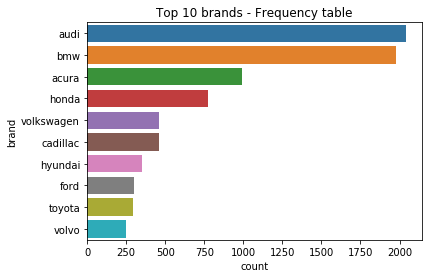

In [4]:
import seaborn as sns

# Top 10 brands
top_10_brands = ['audi', 'bmw', 'acura', 'honda', 'volkswagen', 'cadillac', 'hyundai', 'ford', 'toyota', 'volvo']
ls = []

for word, count in counts.most_common(200):
    if word in top_10_brands:
        ls.append((word,count))

top_10_brands = pd.DataFrame(ls, columns = ['brand', 'count'])
#top_10_brands.plot(kind='bar', x='brand', y='count')
sns.barplot(y='brand', x='count', data=top_10_brands).set_title('Top 10 brands - Frequency table')

In [6]:
# Lift function
def calc_lift(data, a, b):
    
    counta = 0
    countb = 0
    countab = 0
    for s in data:
        if re.search('\s(%s)\s' % a, s):
            counta = counta + 1
        if re.search('\s(%s)\s' % b, s):
            countb = countb + 1
        if re.search('\s(%s)\s' % a, s) and re.search('\s(%s)\s' % b, s):
            countab = countab + 1
            
    return len(data) * countab / (counta * countb)

In [8]:
brands = ['audi', 'bmw', 'acura', 'honda', 'volkswagen', 'cadillac', 'hyundai', 'ford', 'toyota', 'volvo']

lift_matrix = pd.DataFrame(np.nan, index=brands, columns=brands)

for i in range(10):
    for j in range(i+1,10):
        lift_matrix.iloc[i,j] = calc_lift(df, brands[i], brands[j])

# Show all lift calculations in a table
lift_matrix

,audi,bmw,acura,honda,volkswagen,cadillac,hyundai,ford,toyota,volvo
audi,NaN,1.845908,2.247252,1.723681,2.843017,2.934727,1.965585,0.966792,1.692587,2.359136
bmw,NaN,NaN,1.162893,1.042329,0.960425,1.779448,1.464232,1.346455,1.471010,1.715559
acura,NaN,NaN,NaN,3.733728,1.340203,2.478654,1.660122,0.568033,1.270711,2.941330
honda,NaN,NaN,NaN,NaN,1.914320,1.362809,1.798908,1.259019,2.628707,0.897283
volkswagen,NaN,NaN,NaN,NaN,NaN,1.110831,1.866196,3.010279,2.295718,1.462758
cadillac,NaN,NaN,NaN,NaN,NaN,NaN,2.476795,1.836182,2.053803,3.208631
hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.864431,3.222891,1.811933
ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.362227,1.394948
toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.080367
volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


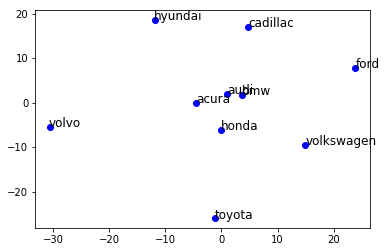

In [9]:
# Show MDS map

X_m = pd.DataFrame(np.nan, index=brands, columns=brands)


for i in range(10):
    for j in range(10):
        X_m.iloc[i,j] = calc_lift(df, brands[i], brands[j])


from sklearn.manifold import MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_m)

for i in range(len(X_mds)):
    x = X_mds[i][0]
    y = X_mds[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , brands[i], fontsize=12)

plt.show()

# Task B:
What insights can you offer brand managers from your analysis in Task A (choose two brands that you can offer the most interesting/useful insights for)? 

Hyundai and Cadillac. With a lift score of 2.507388. It indicates that the association is dependent on each other. However, this is an interesting finding considering that Cadillac is an American brand that focus on entry level luxury car, while Hyundai is a Korean company and the prices are more afforable. I theorized that during the discussion, people usually compare higher-end model of Hyundai to the entry level of the Cadillac car model, resulting in the high lift score.

# Task C:
What are 5 most frequently mentioned attributes of cars in the discussions? Note that the same attribute may be described by different words – e.g., pick-up and acceleration may both refer to a more general attribute, “performance”. You have to make suitable replacements. Now pick the 5 most frequently mentioned brands. Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do a sentiment analysis for this assignment.

In [11]:
brands5 = ['audi', 'bmw', 'acura', 'honda', 'volkswagen']

# Find top attributes names manually
for word, count in counts.most_common(200):
    #print(word, count)
    pass

attributes = ['new', 'price', 'miles', 'seat', 'engine', 'lease', 'luxury', 'performance', 'big', 'cost', 'tires']

# Check lift between attributes before grouping
attributes_matrix = pd.DataFrame(np.nan, index=attributes, columns=attributes)

for i in range(11):
    for j in range(11):
        attributes_matrix.iloc[i,j] = calc_lift(df, attributes[i], attributes[j])
    
# Show all lift calculations in a table
attributes_matrix

,new,price,miles,seat,engine,lease,luxury,performance,big,cost,tires
new,5.092426,1.770017,1.958625,1.777829,1.674842,1.511451,1.513412,1.551978,1.697475,1.991592,1.757563
price,1.770017,11.301994,1.693011,2.541277,1.406470,2.786793,2.178698,2.045123,2.311772,2.853474,0.900159
miles,1.958625,1.693011,16.060729,1.900678,2.426955,2.346773,1.354519,1.835512,1.703411,2.146731,4.121780
seat,1.777829,2.541277,1.900678,23.473373,2.503826,0.535922,1.414059,1.341336,2.489600,1.975482,2.077290
engine,1.674842,1.406470,2.426955,2.503826,17.631111,0.966088,1.699384,2.350815,1.803182,2.007503,1.716303
lease,1.511451,2.786793,2.346773,0.535922,0.966088,18.114155,1.818690,1.380126,1.578127,3.228265,1.603023
luxury,1.513412,2.178698,1.354519,1.414059,1.699384,1.818690,15.931727,3.262211,1.750076,2.050618,1.409887
performance,1.551978,2.045123,1.835512,1.341336,2.350815,1.380126,3.262211,18.890476,2.146645,1.683310,5.516688
big,1.697475,2.311772,1.703411,2.489600,1.803182,1.578127,1.750076,2.146645,15.026515,2.008495,1.994670
cost,1.991592,2.853474,2.146731,1.975482,2.007503,3.228265,2.050618,1.683310,2.008495,19.638614,1.911723


C:\Users\Abhinav\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


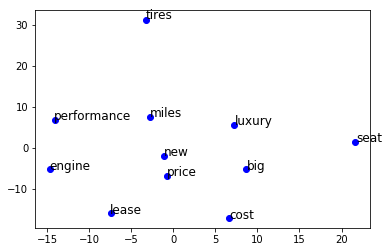

In [13]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
attr_mds = mds.fit_transform(attributes_matrix)

for i in range(len(attr_mds)):
    x = attr_mds[i][0]
    y = attr_mds[i][1]
    plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , attributes[i], fontsize=12)

plt.show()

In [15]:
# According to the graph above, we will group the attributes in the following way:
# 1.) Tires -->                        --> Tires
# 2.) Cost / Lease / Price             --> Cost
# 3.) Seat                             --> Seat
# 4.) Engine / Luxury / Performance    --> Engine
# 5.) New / Big / Miles                --> New

df2 = df.copy() # Grouped attributes
attr_d = {'lease': 'cost',
          'price': 'cost',
          'luxury': 'engine',
          'performance': 'engine',
          'big': 'new',
          'miles': 'new'}
df2 = df2.replace(attr_d, regex=True)
attr_new = ['tires', 'cost', 'seat', 'engine', 'new']

In [16]:
discussion_matrix = pd.DataFrame(np.nan, index=brands5, columns=attr_new)

for i in range(5):
    for j in range(5):
        discussion_matrix.iloc[i,j] = calc_lift(df, brands5[i], attr_new[j])

discussion_matrix

,tires,cost,seat,engine,new
audi,1.797437,1.916729,1.840312,1.833636,1.751795
bmw,1.004230,1.263987,1.762601,1.660140,1.377808
acura,1.423224,1.857707,0.888182,2.430234,1.720414
honda,2.018887,1.694066,2.024860,2.196848,1.871019
volkswagen,1.828448,2.761680,2.078372,2.020231,1.352676


### From our results above
1. Good tires are strongly associated with Honda
2. Reasonable costs are strongly associated with Volkswagen
3. Comfortable seats are strongly associated with Volkswagen
4. High performing engines are strongly associated with Acura
5. Newer models for Honda are preferred for the period our data is from (Oct 2004 - Aug 2019)

# Task D: 
What advice will you give to a (i) product manager, and (ii) marketing/advertising manager of these brands based on your analysis in Task C? For this assignment, you can assume the sentiment (e.g., that it is positive). 

(i) product manager: <br/>
Audi: The weakest lift value for audi was in the new category, and compared to other brands listed, Audi's lift in the new category is middling. While this might imply that audi could have room for improvement in the new category, this might be more of a problem for the marketing manager, as all of the technical components (tires, seat, engine) all ranked highly. <br/>
BMW: The lowest value for BMW is in the tires category, implying that there is little to no correlation with BMW and mentions of tires. If BMW wanted to fix this, they could work on improving their tires. However, I see the biggest issue for the product manager to be with respect to cost. They have the lowest association with cost compared to the 5 brands, implying that there is little to no correlation between BMW and affordableness. Now, this might be something BMW wants to hold on to (as in, they want to remain a more exclusive brand), however, if they wanted to increase their lift in this area, they could always try to build things in a more affordable manner. <br/>
Acura: Acura has a very high correlation with their engine, which is good. However, they have a negative correlation with their seats. They should improve their seats if they wanted to improve this number. <br/>
Honda: There is a high correlation with Honda and tires, Honda and it's engine, and Honda and it's seat, implying that people are happy with the actual physical elements of the car. In addition, the lift for new and Honda is the highest out of all the brands. <br/>
Volkswagen: Volkswagon by far had the highest correlation with cost, implying that people associate affordability with Volkswagons more so than other brands. However, Volkswagon had little to no correlation with new, which might be where Volkswagon has room to improve. <br/>

<br/>
(ii) marketing/advertising manager:<br/>
Audi: Audi's correlation with newness is middling, so it might be worth Audi's time to run campaigns on newness. <br/>
BMW: BMW's correlation with cost is low, so if this was something they wanted to improve, they might want to run campaigns targetting this. However, as stated abover, BMW might want to retain their higher prices. <br/>
Acura: There is a low, negative correlation with seats. They should run a campaign targetting comfort. <br/>
Honda: All of their numbers have positive implications, so they should attempt to capitalize on this by running campaigns which advertis Hondas as "all-in-one" type cars. <br/>
Volkswagon: Volkswagon should focus on campaigns that advertise them as affordable, because people already see them that way, and people enjoy having their opinions validated. 





# Task E: 
Which is the most aspirational brand in your data in terms of people actually wanting to buy or own? Describe your analysis. What are the business implications for this brand?

Write here

In [ ]:
#K = 'hello'
#L = 'man' 
#if re.search('\s(%s)\s' % K, ' hello man ') and re.search('\s(%s)\s' % L, ' hello man '):
#    print(1)
    
#print(len(df))

#df.dropna(inplace=True)
        
#pd.DataFrame(np.nan, index=brands, columns=brands)
#lift_matrix
#calc_lift(df, 'honda', 'honda')
lift_matrix

In [33]:
discussion_matrix_new = pd.DataFrame(np.nan, index=brands, columns=attributes)
for i in range(10):
    for j in range(11):
        discussion_matrix_new.iloc[i,j] = calc_lift(df, brands[i], attributes[j])

discussion_matrix_new

,new,price,miles,seat,engine,lease,luxury,performance,big,cost,tires
audi,1.751795,2.043401,1.798802,1.840312,1.833636,1.188289,2.039261,2.327307,1.682970,1.916729,1.797437
bmw,1.377808,1.939794,1.167705,1.762601,1.660140,1.511312,1.671027,1.801237,1.432802,1.263987,1.004230
acura,1.720414,1.954940,1.128592,0.888182,2.430234,1.811416,2.109877,1.480605,1.989998,1.857707,1.423224
honda,1.871019,1.697105,1.693304,2.024860,2.196848,1.851926,1.577903,1.629530,2.160362,1.694066,2.018887
volkswagen,1.352676,1.295020,1.840292,2.078372,2.020231,0.566067,1.493599,1.475818,2.191367,2.761680,1.828448
cadillac,1.752233,2.309010,0.863480,0.883407,0.568746,1.071267,3.340523,1.828111,2.181268,1.583759,0.754972
hyundai,1.544155,2.114567,1.347029,0.757206,2.047484,1.636117,2.980775,1.584363,1.163343,1.647110,0.452983
ford,1.888582,1.721496,1.276349,2.642698,1.517910,0.359884,2.110163,2.877357,2.189294,1.560685,2.557405
toyota,1.546589,2.260399,2.022462,1.912645,1.306008,1.073431,2.596281,1.959012,1.446998,1.891126,1.040184
volvo,1.802629,2.000353,0.852782,1.661832,1.092193,1.282418,2.114831,2.340413,1.595736,1.042758,1.553371


When discussing aspirational cars, most consumers desire a luxurious experience, one with quality and performance. By considering only the luxury brands such as Audi, BMW, Acura, and Cadillac, we can analyze the results from the above table. Audi has the highest average lift amongst these four brands, meaning it is associated the most, on average, with the tires, cost, seat, engine, and new characteristics. 

One might say to simply look at the luxury column, and I do notice that Cadillac has the highest lift score amongst all brands. But there are important things to notice: Hyundai and Toyota, which are two affordable brands, have higher lift scores than Audi, BMW, and Acura, which are luxurious brands. Secondly, BMW, which is obviously a luxury brand, has the 2nd lowest luxury lift score. Thus, it's important to analyze the whole scope as Cadillac ranks lower in the tires, cost, seat, and engine lift score categories. 

In terms of business implications for Audi, I believe this means that they are focusing their marketing efforts in the right directions. People are understanding how the brand is associated with all-around performance and cost better than the other brands, on average. After running a quick analysis, for each category, Audi is in the top 2 for every category that is specified in the first paragraph of this section.

That being said, it is important to understand where this data is coming from, including the demographics. Because the data in our experiment was extracted from a forum that discussed luxury performance sedans, people will discuss luxurious brands more frequently and may have better knowledege about them, which could be good or bad to brand marketing managers. Secondly, Edmunds may be a forum that only elder people visit, based on the website's design. If this is the case, it is better for marketing managers because typically older people are the people buying luxury cars. But, this is something managers must be cognizant about since typically elder Americans do prefer to buy American-made cars (such as Cadillac). Third, we don't know the income of all of the people in the thread, so it is likely some of them are not really a brand's target customer, who are the people that have the disposable income to spend on a luxury vehicle.  Finally, it is important to note that we can't tell if people are actually going to buy or own these cars -- this forum is simply people **discussing** various car brands. Discussing and actually buying, especially when you don't know if these people are able to afford a luxury vehicle, are completely different things.